In [10]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000)

len(X_train), len(X_test), len(y_train), len(y_test)

(60000, 10000, 60000, 10000)

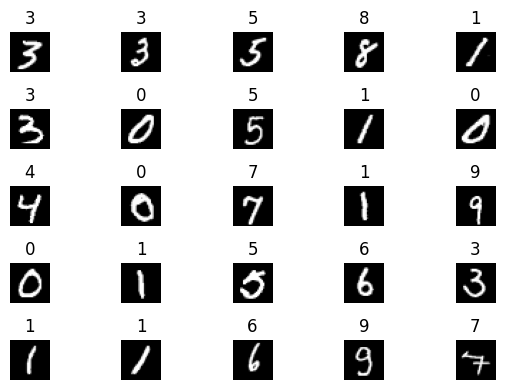

In [2]:
import matplotlib.pyplot as plt
import random

fig = plt.figure(dpi=100)
for ix in range(25):
    ax = plt.subplot(5, 5, ix + 1)
    i = random.randint(0, len(X_train)-1)
    img, label = X_train[i], y_train[i]
    ax.imshow(img.reshape(28, 28), cmap="gray")
    ax.set_title(label)
    ax.axis("off")
plt.tight_layout()
plt.show()

In [3]:
import numpy as np

X_train_3 = X_train[y_train == "3"][:100]
X_train_no_3 = X_train[y_train != "3"][:100]

len(X_train_3), len(X_train_no_3)

(100, 100)

In [4]:
def plot_samples(X):
    fig = plt.figure(dpi=100)
    for ix in range(25):
        ax = plt.subplot(5, 5, ix + 1)
        i = random.randint(0, len(X)-1)
        img = X[i]
        ax.imshow(img.reshape(28, 28), cmap="gray")
        ax.axis("off")
    plt.tight_layout()
    plt.show()

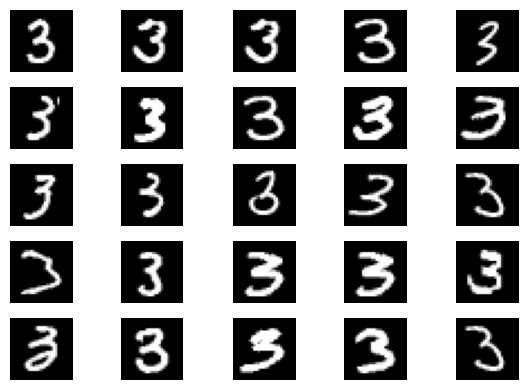

In [5]:
plot_samples(X_train_3)

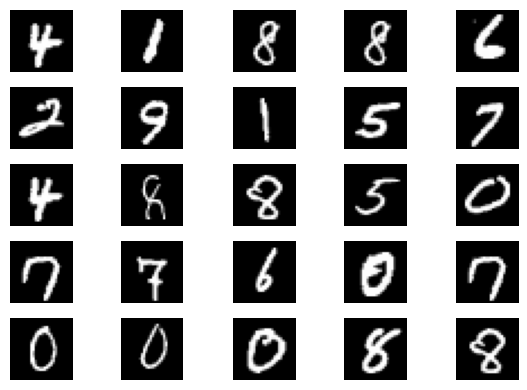

In [6]:
plot_samples(X_train_no_3)

In [11]:
import os
from pathlib import Path
from skimage.io import imsave
import shutil

path = Path("dataset")

def generate_dataset(X_train_3, X_train_no_3, test_size):
    shutil.rmtree(path)
    os.makedirs(path, exist_ok=True)

    splits = ["train", "test"]
    for split in splits:
        os.makedirs(path / split, exist_ok=True)
        os.makedirs(path / split / "3", exist_ok=True)
        os.makedirs(path / split / "no3", exist_ok=True)
        if split == "train":
            X1, X2 = X_train_3[:-test_size], X_train_no_3[:-test_size]
        else:
            X1, X2 = X_train_3[-test_size:], X_train_no_3[-test_size:]
        for x1, x2 in zip(X1, X2):
            imsave(path / split / "3" / f"{random.randint(0, 99999):05d}.png", x1.reshape(28, 28).astype(np.uint8))
            imsave(path / split / "no3" / f"{random.randint(0, 99999):05d}.png", x2.reshape(28, 28).astype(np.uint8))

In [13]:
generate_dataset(X_train_3, X_train_no_3, 20)

In [14]:
from glob import glob
def get_paths():
    train_3 = glob(str(path / "train" / "3" / "*.png"))
    train_no3 = glob(str(path / "train" / "no3" / "*.png"))
    test_3 = glob(str(path / "test" / "3" / "*.png"))
    test_no3 = glob(str(path / "test" / "no3" / "*.png"))
    return train_3, train_no3, test_3, test_no3

train_3, train_no3, test_3, test_no3 = get_paths()

len(train_3), len(train_no3), len(test_3), len(test_no3)

(80, 80, 20, 20)

## Data versioning

In [ ]:
# $ pip install dvc
# $ dvc init
# $ dvc add dataset

# Many cloud storage services can be also used to track files there, in this case we will use Firebase
# Go to Firebase and create a new project
# Go to Storage and copy the URL (gs://<project_id>.appspot.com)

# $ dvc remote add -d storage gs://<project_id>.appspot.com
# you can check on the .dvc dir, on the config file, all of these new changes

# Go to the Firebase project configuration, Accounts and services, Generate a new private key and downlaod the .json file with it
# Add the file on the repo and untrack it on the .gitignore

# $ export GOOGLE_APPLICATION_CREDENTIALS=<path_to_json_file>

# $ dvc push

# In order to test that it really works:
# $ rm -rf dataset
# $ dvc pull
# And data will be downloaded to the local directory again from the cloud storage

# $ git tag -a v0 -m "version 0"
# $ git push origin --tags

# Now in this version not only we will have the code for the v0 but also the data tracked

# Then add new data to the dataset with more images:
# $ dvc add dataset
# $ dvc push
# $ git tag -a v1 -m "version 1"
# $ git add .
# $ git commit -m "version 1"
# $ git push
# $ git push origin --tags

# To go back to the v0 data and code:
# $ git checkout v0
# $ dvc pull

# Again to the v1:
# $ git checkout v1
# $ dvc pull
